<a href="https://colab.research.google.com/github/thiagofrigo/An-lise-ocorr-ncia-de-acidentes/blob/main/case_blackbird_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case de dados Blackbird



Importando bibliotecas necessárias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, precision_score,recall_score,f1_score
import seaborn as sns

Carregando arquivo com os dados

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Data_-_Case_Dados.xls to Data_-_Case_Dados (1).xls


In [ ]:
import pandas as pd
data = pd.read_excel("Data_-_Case_Dados.xls",sheet_name=1, engine="xlrd")
data.head()

,Rush Hour,Alcohol Involved,Align,Work Zone,Weekday,Accident at Intersection,Accident at Roadway,Speed Limit,Number of Vehical Involved,Weather,Injury
0,0,0,2,0,1,1,0,40,1,No,1
1,1,0,1,0,1,1,1,70,2,Yes,2
2,1,0,1,0,1,1,1,35,2,Yes,2
3,1,0,1,0,0,1,1,35,2,No,2
4,1,1,1,0,1,0,1,25,3,No,2


Tratando as colunas e separando variáveis dependentes/independentes

In [ ]:
#Verificando a presença de valores nulos
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42183 entries, 0 to 42182
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Rush Hour                   42183 non-null  int64 
 1   Alcohol Involved            42183 non-null  int64 
 2   Align                       42183 non-null  int64 
 3   Work Zone                   42183 non-null  int64 
 4   Weekday                     42183 non-null  int64 
 5   Accident at Intersection    42183 non-null  int64 
 6   Accident at Roadway         42183 non-null  int64 
 7   Speed Limit                 42183 non-null  int64 
 8   Number of Vehical Involved  42183 non-null  int64 
 9   Weather                     42183 non-null  object
 10  Injury                      42183 non-null  int64 
dtypes: int64(10), object(1)
memory usage: 3.5+ MB
None


In [ ]:
#Separando as colunas numericas
numeric_columns = data.select_dtypes(include=['number']).columns

In [ ]:
#Preenchendo as colunas numericas com que possuem valores nulos
numeric_columns = data.select_dtypes(include=[np.number]).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())
data.head()

,Rush Hour,Alcohol Involved,Align,Work Zone,Weekday,Accident at Intersection,Accident at Roadway,Speed Limit,Number of Vehical Involved,Weather,Injury
0,0,0,2,0,1,1,0,40,1,No,1
1,1,0,1,0,1,1,1,70,2,Yes,2
2,1,0,1,0,1,1,1,35,2,Yes,2
3,1,0,1,0,0,1,1,35,2,No,2
4,1,1,1,0,1,0,1,25,3,No,2


In [ ]:
#Tratando a coluna Weather separadamente pois ela não é do tipo numérico
data['Weather'] = data['Weather'].fillna(data['Weather'].mode()[0])
data.head()

,Rush Hour,Alcohol Involved,Align,Work Zone,Weekday,Accident at Intersection,Accident at Roadway,Speed Limit,Number of Vehical Involved,Weather,Injury
0,0,0,2,0,1,1,0,40,1,No,1
1,1,0,1,0,1,1,1,70,2,Yes,2
2,1,0,1,0,1,1,1,35,2,Yes,2
3,1,0,1,0,0,1,1,35,2,No,2
4,1,1,1,0,1,0,1,25,3,No,2


In [ ]:
#Transformando coluna Weather em numérico binario
data =  pd.get_dummies(data,columns=['Weather'],drop_first=True)
data['Weather_Yes'] = data['Weather_Yes'].astype(int)
data.head()

,Rush Hour,Alcohol Involved,Align,Work Zone,Weekday,Accident at Intersection,Accident at Roadway,Speed Limit,Number of Vehical Involved,Injury,Weather_Yes
0,0,0,2,0,1,1,0,40,1,1,0
1,1,0,1,0,1,1,1,70,2,2,1
2,1,0,1,0,1,1,1,35,2,2,1
3,1,0,1,0,0,1,1,35,2,2,0
4,1,1,1,0,1,0,1,25,3,2,0


In [ ]:
#Modificando a coluna injury para 0 sem ferimento e 1 com ferimentos
data["Injury"] = data["Injury"].replace({2: 0, 1: 1})

#Modificando a coluna Align para 1=straight 2=curve
data['Align'] = data['Align'].replace({1:1, 2:0})
data.head()

,Rush Hour,Alcohol Involved,Align,Work Zone,Weekday,Accident at Intersection,Accident at Roadway,Speed Limit,Number of Vehical Involved,Injury,Weather_Yes
0,0,0,0,0,1,1,0,40,1,1,0
1,1,0,1,0,1,1,1,70,2,0,1
2,1,0,1,0,1,1,1,35,2,0,1
3,1,0,1,0,0,1,1,35,2,0,0
4,1,1,1,0,1,0,1,25,3,0,0


In [ ]:
#Separando variaveis dependentes e independentes
variaves_independentes = data.drop('Injury', axis = 1)
variaveis_dependentes = data['Injury']


Neste trecho vamos dividir nossos dados em teste e treino

Usarei 25% dos dados para teste, pensando em um equilibrio entre testes e treinos

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(variaves_independentes, variaveis_dependentes, test_size=0.2, random_state=42)

# Agora com nossos dados tratador e separados entre treino e teste, podemos aplicar o algoritmo de regressão linear, vamos utilizar a biblioteca sklearn

In [ ]:
regressao_model = LinearRegression()
regressao_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Realizando previsões
y_pred = regressao_model.predict(X_test)
print(y_pred)

[0.60023779 0.58700743 0.4474988  ... 0.51334477 0.49985825 0.46058523]


In [ ]:
print("Coeficientes:", regressao_model.coef_)
print("Intercepto:", regressao_model.intercept_)

Coeficientes: [ 0.00402485  0.08286817 -0.02318632 -0.03280484 -0.02497014  0.03417565
  0.00736641  0.00011345  0.0378894  -0.05628856]
Intercepto: 0.4402095619260338


In [ ]:
#Transformando os dados de predição em dados binarios
regressao_pred_binario = [1 if y >= 0.5 else 0 for y in y_pred]

In [ ]:
#Criando métricas para avaliação do modelo
accuracy_regressao_linear = accuracy_score(y_test, regressao_pred_binario)
precision_regressao_linear = precision_score(y_test, regressao_pred_binario)
recall_regressao_linear = recall_score(y_test, regressao_pred_binario)
f1_regressao_linear = f1_score(y_test, regressao_pred_binario)

print(f"Acuracia: {accuracy_regressao_linear:.2f}")
print(f"Precisão: {precision_regressao_linear:.2f}")
print(f"Recall: {recall_regressao_linear:.2f}")
print(f"f1: {f1_regressao_linear:.2f}")

Acuracia: 0.52
Precisão: 0.51
Recall: 0.59
f1: 0.55


In [ ]:
mse_regressao_linear = mean_squared_error(y_test, y_pred)
r2_regressao_linear = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse_regressao_linear:.2f}")
print(f"R² Score: {r2_regressao_linear:.2f}")

Mean Squared Error (MSE): 0.25
R² Score: 0.01


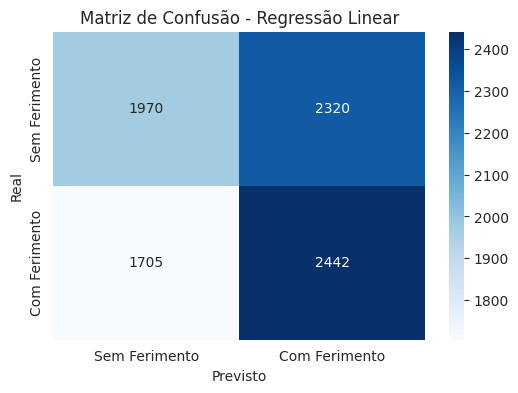

In [ ]:
#Gerando matriz de confusão
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, regressao_pred_binario)


plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Sem Ferimento", "Com Ferimento"], yticklabels=["Sem Ferimento", "Com Ferimento"])
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Regressão Linear")
plt.show()

# Vamos realizar a mesma análise mas agora com o modelo de Random Florest

In [ ]:
from sklearn.ensemble  import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
random_forest_model = RandomForestClassifier(n_estimators=500, random_state=42)
random_forest_model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=500, random_state=42)

In [ ]:
forest_pred = random_forest_model.predict(X_test)
print(forest_pred)

[1 1 0 ... 0 1 1]


In [ ]:
accuracy_random_forest = accuracy_score(y_test, forest_pred)
precision_random_forest = precision_score(y_test, forest_pred)
recall_random_forest = recall_score(y_test, forest_pred)
f1_random_forest = f1_score(y_test, forest_pred)

print(f"Acuracia: {accuracy_random_forest:.2f}")
print(f"Precisão: {precision_random_forest:.2f}")
print(f"Recall: {recall_random_forest:.2f}")
print(f"f1: {f1_random_forest:.2f}")

Acuracia: 0.57
Precisão: 0.57
Recall: 0.48
f1: 0.52


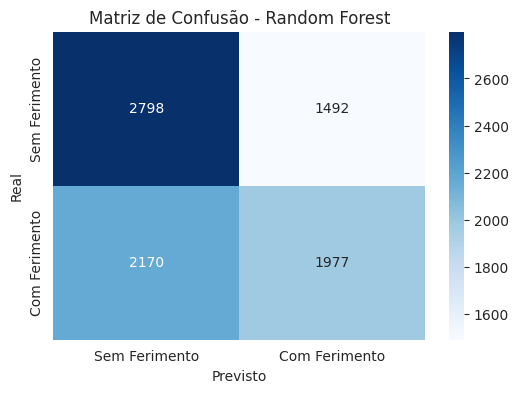

In [ ]:
matrix_confusao_forest = confusion_matrix(y_test, forest_pred)

plt.figure(figsize=(6,4))
sns.heatmap(matrix_confusao_forest, annot=True, fmt="d", cmap="Blues", xticklabels=["Sem Ferimento", "Com Ferimento"], yticklabels=["Sem Ferimento", "Com Ferimento"])
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Random Forest")
plt.show()

# Vamos gerar alguns gráficos para interpretar os dados

<ipython-input-200-77b6bd75b6d2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data["Injury"], palette=["blue", "red"])


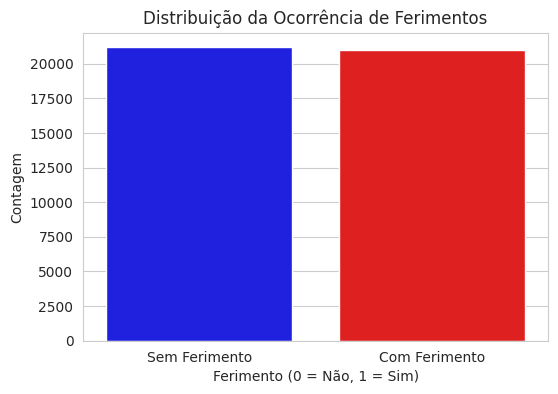

In [ ]:
# Configuração de estilo para os gráficos
sns.set_style("whitegrid")

# 1. Distribuição da variável alvo (Injury)
plt.figure(figsize=(6, 4))
sns.countplot(x=data["Injury"], palette=["blue", "red"])
plt.title("Distribuição da Ocorrência de Ferimentos")
plt.xlabel("Ferimento (0 = Não, 1 = Sim)")
plt.ylabel("Contagem")
plt.xticks([0, 1], ["Sem Ferimento", "Com Ferimento"])
plt.show()

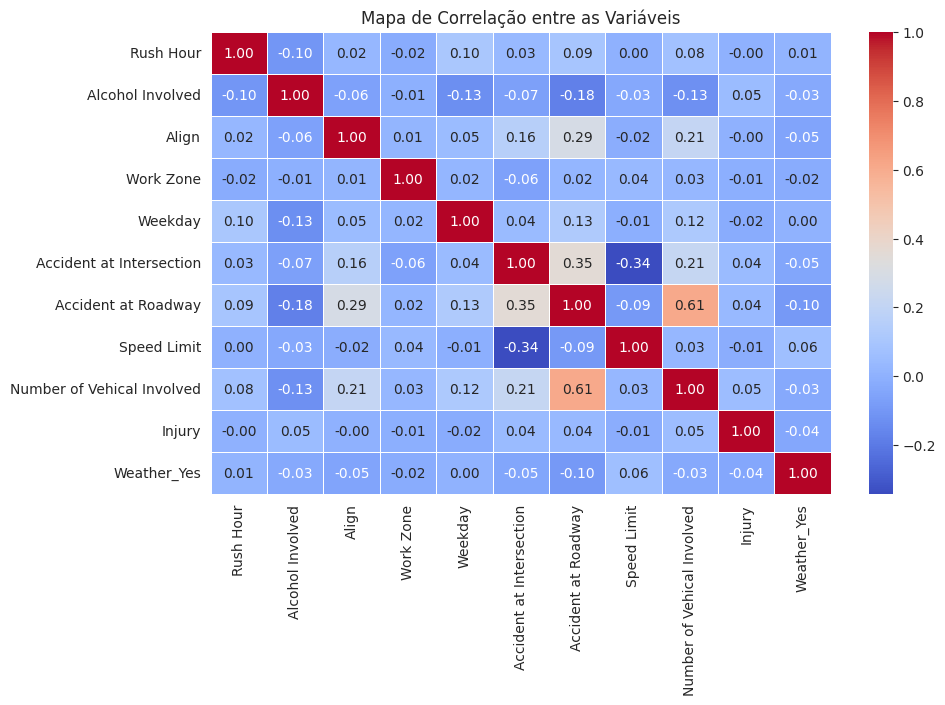

In [ ]:
#Correlação das variaveis
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Mapa de Correlação entre as Variáveis")
plt.show()

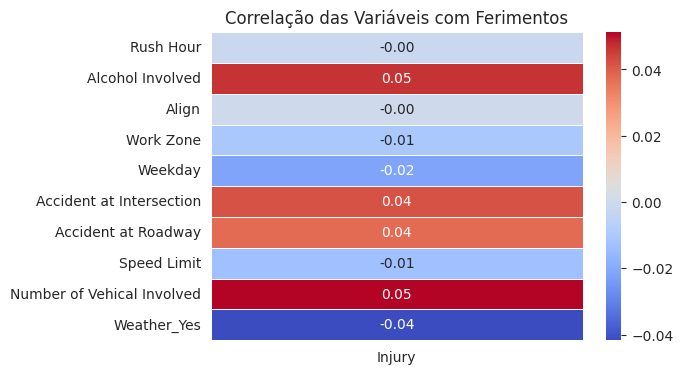

In [ ]:
#Removendo a correlação da coluna Injury com ela mesma
corr_injury = data.corr()["Injury"].drop("Injury")

#Gráfico de barras para destacar a relação de cada variável com a coluna Injury
plt.figure(figsize=(6, 4))
sns.heatmap(corr_injury.to_frame(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlação das Variáveis com Ferimentos")
plt.show()

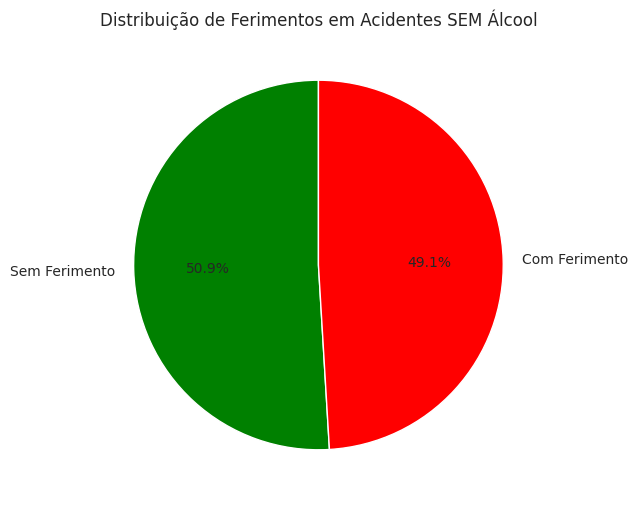

In [ ]:
# Contagem de acidentes com e sem ferimentos para cada categoria de "Alcohol Involved"
injury_alcohol_counts = data.groupby("Alcohol Involved")["Injury"].value_counts().unstack()

#Gráfico de pizza para acidentes sem álcool
plt.figure(figsize=(6, 6))
plt.pie(injury_alcohol_counts.loc[0], labels=["Sem Ferimento", "Com Ferimento"], autopct='%1.1f%%', colors=["green", "red"], startangle=90)
plt.title("Distribuição de Ferimentos em Acidentes SEM Álcool")
plt.show()



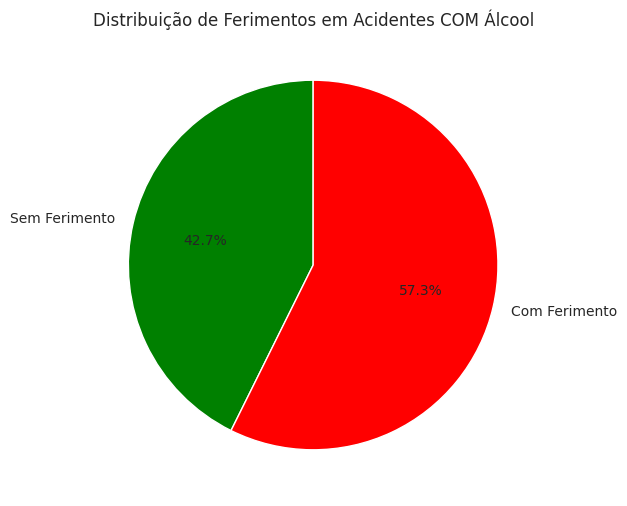

In [ ]:
#Gráfico de pizza para acidentes com álcool
plt.figure(figsize=(6, 6))
plt.pie(injury_alcohol_counts.loc[1], labels=["Sem Ferimento", "Com Ferimento"], autopct='%1.1f%%', colors=["green", "red"], startangle=90)
plt.title("Distribuição de Ferimentos em Acidentes COM Álcool")
plt.show()

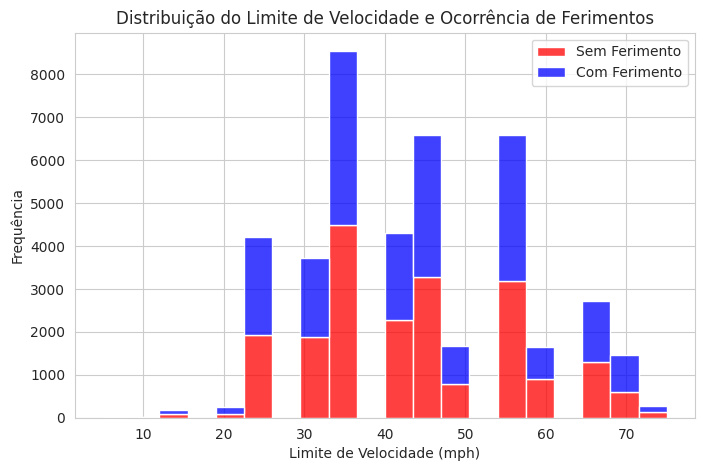

In [ ]:
#Gráfico de barras para entender a como o limite de velodicadade está ligado a ocorrencia de ferimentos
plt.figure(figsize=(8, 5))
sns.histplot(data, x="Speed Limit", hue="Injury", multiple="stack", bins=20, palette=["blue", "red"])
plt.title("Distribuição do Limite de Velocidade e Ocorrência de Ferimentos")
plt.xlabel("Limite de Velocidade (mph)")
plt.ylabel("Frequência")
plt.legend(["Sem Ferimento", "Com Ferimento"])
plt.show()